In [66]:
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LinearRegression

Download Data from Kaggle

In [ ]:
od.download("https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023")

In [2]:
video_games = pd.read_csv("games.csv")

Basic Info of the Data

In [3]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [4]:
video_games.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [5]:
video_games.rename(columns = {'Release Date':'Release_Date','Times Listed':'Times_Listed',
                             'Number of Reviews':'Num_of_Reviews'}, inplace = True)

In [6]:
video_games.shape

(1512, 14)

In [7]:
video_games.drop("Unnamed: 0", axis = 1, inplace = True)

Check and Drop Duplicated Records

In [8]:
video_games.duplicated().any()

True

In [9]:
video_games = video_games.drop_duplicates().sort_index()

In [10]:
video_games.duplicated().any()

False

Missing Data 

In [11]:
# Team, Ratings, Summary contains null values

In [12]:
video_games[pd.isnull(video_games["Team"])]

,Title,Release_Date,Team,Rating,Times_Listed,Num_of_Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1245,NEET Girl Date Night,"Oct 21, 2022",NaN,2.7,21,21,['Visual Novel'],Your friend sets you up on a date with his NEE...,"['this sucked. ""Omg she is literally me"" is no...",106,1,44,42


In [13]:
video_games.loc[1245,['Team']] = "Hitsuji Goods"

In [14]:
video_games[pd.isnull(video_games["Rating"])]

,Title,Release_Date,Team,Rating,Times_Listed,Num_of_Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
587,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business...",NaN,422,422,['RPG'],Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2.4K
649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
713,Final Fantasy VII Rebirth,"Dec 31, 2023",['Square Enix'],NaN,192,192,[],This next standalone chapter in the FINAL FANT...,[],20,3,354,1.1K
719,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NaN,175,175,['RPG'],"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
726,Judas,"Mar 31, 2025",['Ghost Story Games'],NaN,90,90,"['Adventure', 'Shooter']",A disintegrating starship. A desperate escape ...,[],1,0,92,437
746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023","['Ryū Ga Gotoku Studios', 'Sega']",NaN,118,118,"['Adventure', 'Brawler', 'RPG']",This game covers Kiryu's story between Yakuza ...,[],2,1,145,588
972,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023","['Nintendo', 'Nintendo EPD Production Group No...",NaN,581,581,"['Adventure', 'RPG']",The Legend of Zelda: Tears of the Kingdom is t...,[],72,6,1.6K,5.4K
1130,Star Wars Jedi: Survivor,"Apr 28, 2023","['Respawn Entertainment', 'Electronic Arts']",NaN,250,250,['Adventure'],The story of Cal Kestis continues in Star Wars...,[],13,2,367,1.4K
1160,We Love Katamari Reroll + Royal Reverie,"Jun 02, 2023","['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51,51,"['Adventure', 'Puzzle']",We Love Katamari Reroll + Royal Reverie is a r...,[],3,0,74,291
1202,Earthblade,"Dec 31, 2024",['Extremely OK Games'],NaN,83,83,"['Adventure', 'Indie', 'RPG']","You are Névoa, an enigmatic child of Fate retu...",[],0,1,103,529


In [15]:
# Leave it as null for later use.

In [16]:
video_games = video_games[video_games.Release_Date != 'releases on TBD']

Clean Data and Add Relevant Features

In [17]:
video_games["Release_Date"] = pd.to_datetime(video_games["Release_Date"])

In [18]:
video_games['Month'] = video_games.Release_Date.dt.month
video_games['Year'] = video_games.Release_Date.dt.year

In [19]:
video_games['Year'] = video_games['Year'].astype('Int64')
video_games['Month'] = video_games['Month'].astype('Int64')

In [20]:
video_games["Team"] = video_games["Team"].str.strip('[')
video_games["Team"] = video_games["Team"].str.strip(']')
video_games["Genres"] = video_games["Genres"].str.strip('[')
video_games["Genres"] = video_games["Genres"].str.strip(']')
video_games["Reviews"] = video_games["Reviews"].str.strip('[')
video_games["Reviews"] = video_games["Reviews"].str.strip(']')

In [21]:
video_games.head()

,Title,Release_Date,Team,Rating,Times_Listed,Num_of_Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Month,Year
0,Elden Ring,2022-02-25,"'Bandai Namco Entertainment', 'FromSoftware'",4.5,3.9K,3.9K,"'Adventure', 'RPG'","Elden Ring is a fantasy, action and open world...","""The first playthrough of elden ring is one of...",17K,3.8K,4.6K,4.8K,2,2022
1,Hades,2019-12-10,'Supergiant Games',4.3,2.9K,2.9K,"'Adventure', 'Brawler', 'Indie', 'RPG'",A rogue-lite hack and slash dungeon crawler in...,'convinced this is a roguelike for people who ...,21K,3.2K,6.3K,3.6K,12,2019
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"'Nintendo', 'Nintendo EPD Production Group No. 3'",4.4,4.3K,4.3K,"'Adventure', 'RPG'",The Legend of Zelda: Breath of the Wild is the...,'This game is the game (that is not CS:GO) tha...,30K,2.5K,5K,2.6K,3,2017
3,Undertale,2015-09-15,"'tobyfox', '8-4'",4.2,3.5K,3.5K,"'Adventure', 'Indie', 'RPG', 'Turn Based Strat...","A small child falls into the Underground, wher...",'soundtrack is tied for #1 with nier automata....,28K,679,4.9K,1.8K,9,2015
4,Hollow Knight,2017-02-24,'Team Cherry',4.4,3K,3K,"'Adventure', 'Indie', 'Platform'",A 2D metroidvania with an emphasis on close co...,"""this games worldbuilding is incredible, with ...",21K,2.4K,8.3K,2.3K,2,2017


In [22]:
video_games.loc[video_games['Times_Listed'].str.contains('K'), 'Times_Listed'] = video_games.Times_Listed.str.strip('K').astype(float)*1000

In [23]:
video_games.loc[video_games['Num_of_Reviews'].str.contains('K'), 'Num_of_Reviews'] = video_games.Num_of_Reviews.str.strip('K').astype(float)*1000
video_games.loc[video_games['Plays'].str.contains('K'), 'Plays'] = video_games.Plays.str.strip('K').astype(float)*1000
video_games.loc[video_games['Playing'].str.contains('K'), 'Playing'] = video_games.Playing.str.strip('K').astype(float)*1000
video_games.loc[video_games['Backlogs'].str.contains('K'), 'Backlogs'] = video_games.Backlogs.str.strip('K').astype(float)*1000
video_games.loc[video_games['Wishlist'].str.contains('K'), 'Wishlist'] = video_games.Wishlist.str.strip('K').astype(float)*1000

In [24]:
video_games.Times_Listed = video_games.Times_Listed.astype(float)
video_games.Num_of_Reviews = video_games.Num_of_Reviews.astype(float)
video_games.Plays = video_games.Plays.astype(float)
video_games.Playing = video_games.Playing.astype(float)
video_games.Backlogs = video_games.Backlogs.astype(float)
video_games.Wishlist = video_games.Wishlist.astype(float)

In [25]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1511
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Title           1127 non-null   object        
 1   Release_Date    1127 non-null   datetime64[ns]
 2   Team            1127 non-null   object        
 3   Rating          1115 non-null   float64       
 4   Times_Listed    1127 non-null   float64       
 5   Num_of_Reviews  1127 non-null   float64       
 6   Genres          1127 non-null   object        
 7   Summary         1127 non-null   object        
 8   Reviews         1127 non-null   object        
 9   Plays           1127 non-null   float64       
 10  Playing         1127 non-null   float64       
 11  Backlogs        1127 non-null   float64       
 12  Wishlist        1127 non-null   float64       
 13  Month           1127 non-null   Int64         
 14  Year            1127 non-null   Int64         
dtypes: I

In [26]:
video_games.describe()

,Rating,Times_Listed,Num_of_Reviews,Plays,Playing,Backlogs,Wishlist,Month,Year
count,1115.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,3.659462,618.162378,618.162378,5071.470275,197.173913,1190.093168,620.591837,7.257320,2011.702751
std,0.539639,574.394731,574.394731,5048.576647,346.873176,1162.971707,675.066733,3.489311,8.634138
min,0.700000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1980.000000
25%,3.400000,235.500000,235.500000,1550.000000,33.000000,385.000000,178.500000,4.000000,2006.000000
50%,3.700000,447.000000,447.000000,3300.000000,83.000000,773.000000,409.000000,8.000000,2013.000000
75%,4.100000,798.500000,798.500000,6900.000000,206.000000,1700.000000,780.500000,10.000000,2019.000000
max,4.600000,4300.000000,4300.000000,33000.000000,3800.000000,8300.000000,5400.000000,12.000000,2025.000000


In [ ]:
# Separate Records without Ratings into different dataset

In [27]:
video_games_complete = video_games.dropna(subset=['Rating'])
video_games_prediction = video_games[pd.isnull(video_games["Rating"])]

In [63]:
video_games_complete

,Title,Release_Date,Team,Rating,Times_Listed,Num_of_Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Month,Year
0,Elden Ring,2022-02-25,"'Bandai Namco Entertainment', 'FromSoftware'",4.5,3900.0,3900.0,"'Adventure', 'RPG'","Elden Ring is a fantasy, action and open world...","""The first playthrough of elden ring is one of...",17000.0,3800.0,4600.0,4800.0,2,2022
1,Hades,2019-12-10,'Supergiant Games',4.3,2900.0,2900.0,"'Adventure', 'Brawler', 'Indie', 'RPG'",A rogue-lite hack and slash dungeon crawler in...,'convinced this is a roguelike for people who ...,21000.0,3200.0,6300.0,3600.0,12,2019
2,The Legend of Zelda: Breath of the Wild,2017-03-03,"'Nintendo', 'Nintendo EPD Production Group No. 3'",4.4,4300.0,4300.0,"'Adventure', 'RPG'",The Legend of Zelda: Breath of the Wild is the...,'This game is the game (that is not CS:GO) tha...,30000.0,2500.0,5000.0,2600.0,3,2017
3,Undertale,2015-09-15,"'tobyfox', '8-4'",4.2,3500.0,3500.0,"'Adventure', 'Indie', 'RPG', 'Turn Based Strat...","A small child falls into the Underground, wher...",'soundtrack is tied for #1 with nier automata....,28000.0,679.0,4900.0,1800.0,9,2015
4,Hollow Knight,2017-02-24,'Team Cherry',4.4,3000.0,3000.0,"'Adventure', 'Indie', 'Platform'",A 2D metroidvania with an emphasis on close co...,"""this games worldbuilding is incredible, with ...",21000.0,2400.0,8300.0,2300.0,2,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Back to the Future: The Game,2010-12-22,'Telltale Games',3.2,94.0,94.0,"'Adventure', 'Point-and-Click'",Back to the Future: The Game is one of Telltal...,'Very enjoyable game. The story adds onto the ...,763.0,5.0,223.0,67.0,12,2010
1508,Team Sonic Racing,2019-05-21,"'Sumo Digital', 'Sega'",2.9,264.0,264.0,"'Arcade', 'Racing'",Team Sonic Racing combines the best elements o...,"'jogo morto mas bom', 'not my cup of tea', ""Co...",1500.0,49.0,413.0,107.0,5,2019
1509,Dragon's Dogma,2012-05-22,'Capcom',3.7,210.0,210.0,"'Brawler', 'RPG'","Set in a huge open world, Dragon’s Dogma: Dark...","'Underrated.', 'A grandes rasgos, es como un M...",1100.0,45.0,487.0,206.0,5,2012
1510,Baldur's Gate 3,2020-10-06,'Larian Studios',4.1,165.0,165.0,"'Adventure', 'RPG', 'Strategy', 'Tactical', 'T...","An ancient evil has returned to Baldur's Gate,...",'Bu türe bu oyunla girmeye çalışmak hataydı sa...,269.0,79.0,388.0,602.0,10,2020


Create new dataframes for team, genre, and review.

In [29]:
video_games_team = video_games_complete[['Title','Team', 'Rating']]
video_games_team["Team"]= video_games_team["Team"].str.split("\',", n = -1, expand = False)
video_games_team = video_games_team.explode('Team')
video_games_team["Team"] = video_games_team["Team"].str.strip()
video_games_team["Team"] = video_games_team["Team"].str.strip("\'")
video_games_team["Team"] = video_games_team["Team"].str.strip("\"")

<ipython-input-29-535db0d33399>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_games_team["Team"]= video_games_team["Team"].str.split("\',", n = -1, expand = False)


In [30]:
#video_games_team = video_games[['Title','Team']]
#video_games_team = pd.DataFrame(video_games.Team.str.split(',').tolist(), index = video_games.Title).stack()
#video_games_team = video_games_team.reset_index([0, 'Title'])
#video_games_team.columns = ['Title', 'Team']
#video_games_team["Team"] = video_games_team["Team"].str.strip()

In [31]:
video_games_team

,Title,Team,Rating
0,Elden Ring,Bandai Namco Entertainment,4.5
0,Elden Ring,FromSoftware,4.5
1,Hades,Supergiant Games,4.3
2,The Legend of Zelda: Breath of the Wild,Nintendo,4.4
2,The Legend of Zelda: Breath of the Wild,Nintendo EPD Production Group No. 3,4.4
...,...,...,...
1508,Team Sonic Racing,Sega,2.9
1509,Dragon's Dogma,Capcom,3.7
1510,Baldur's Gate 3,Larian Studios,4.1
1511,The LEGO Movie Videogame,WB Games,2.8


In [32]:
video_games_genre = video_games_complete[['Title','Genres', 'Rating']]
video_games_genre["Genres"]= video_games_genre["Genres"].str.split(",", n = -1, expand = False)
video_games_genre = video_games_genre.explode('Genres')
video_games_genre["Genres"] = video_games_genre["Genres"].str.strip()
video_games_genre["Genres"] = video_games_genre["Genres"].str.strip("\'")
video_games_genre["Genres"] = video_games_genre["Genres"].str.strip("\"")

<ipython-input-32-0a9626a0e415>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_games_genre["Genres"]= video_games_genre["Genres"].str.split(",", n = -1, expand = False)


In [33]:
video_games_genre

,Title,Genres,Rating
0,Elden Ring,Adventure,4.5
0,Elden Ring,RPG,4.5
1,Hades,Adventure,4.3
1,Hades,Brawler,4.3
1,Hades,Indie,4.3
...,...,...,...
1510,Baldur's Gate 3,Strategy,4.1
1510,Baldur's Gate 3,Tactical,4.1
1510,Baldur's Gate 3,Turn Based Strategy,4.1
1511,The LEGO Movie Videogame,Adventure,2.8


In [34]:
#video_games_genre = video_games[['Title','Genres']]
#video_games_genre = pd.DataFrame(video_games_genre.Genres.str.split(',').tolist(), index = video_games.Title).stack()
#video_games_genre = video_games_genre.reset_index([0, 'Title'])
#video_games_genre.columns = ['Title', 'Genre']
#video_games_genre["Genre"] = video_games_genre["Genre"].str.strip()

In [35]:
video_games_genre

,Title,Genres,Rating
0,Elden Ring,Adventure,4.5
0,Elden Ring,RPG,4.5
1,Hades,Adventure,4.3
1,Hades,Brawler,4.3
1,Hades,Indie,4.3
...,...,...,...
1510,Baldur's Gate 3,Strategy,4.1
1510,Baldur's Gate 3,Tactical,4.1
1510,Baldur's Gate 3,Turn Based Strategy,4.1
1511,The LEGO Movie Videogame,Adventure,2.8


In [49]:
video_games_review = video_games_complete[['Title','Reviews']]
#video_games_review = pd.DataFrame(video_games_review.Reviews.str.split('\',').tolist(), index = video_games_complete.Title).stack()
#video_games_review = video_games_review.reset_index([0, 'Title'])
#video_games_review.columns = ['Title', 'Review']
#video_games_review["Review"] = video_games_review["Review"].str.strip()

In [50]:
video_games_review

,Title,Reviews
0,Elden Ring,"""The first playthrough of elden ring is one of..."
1,Hades,'convinced this is a roguelike for people who ...
2,The Legend of Zelda: Breath of the Wild,'This game is the game (that is not CS:GO) tha...
3,Undertale,'soundtrack is tied for #1 with nier automata....
4,Hollow Knight,"""this games worldbuilding is incredible, with ..."
...,...,...
1507,Back to the Future: The Game,'Very enjoyable game. The story adds onto the ...
1508,Team Sonic Racing,"'jogo morto mas bom', 'not my cup of tea', ""Co..."
1509,Dragon's Dogma,"'Underrated.', 'A grandes rasgos, es como un M..."
1510,Baldur's Gate 3,'Bu türe bu oyunla girmeye çalışmak hataydı sa...


Data Visualization

/Users/amberhuang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


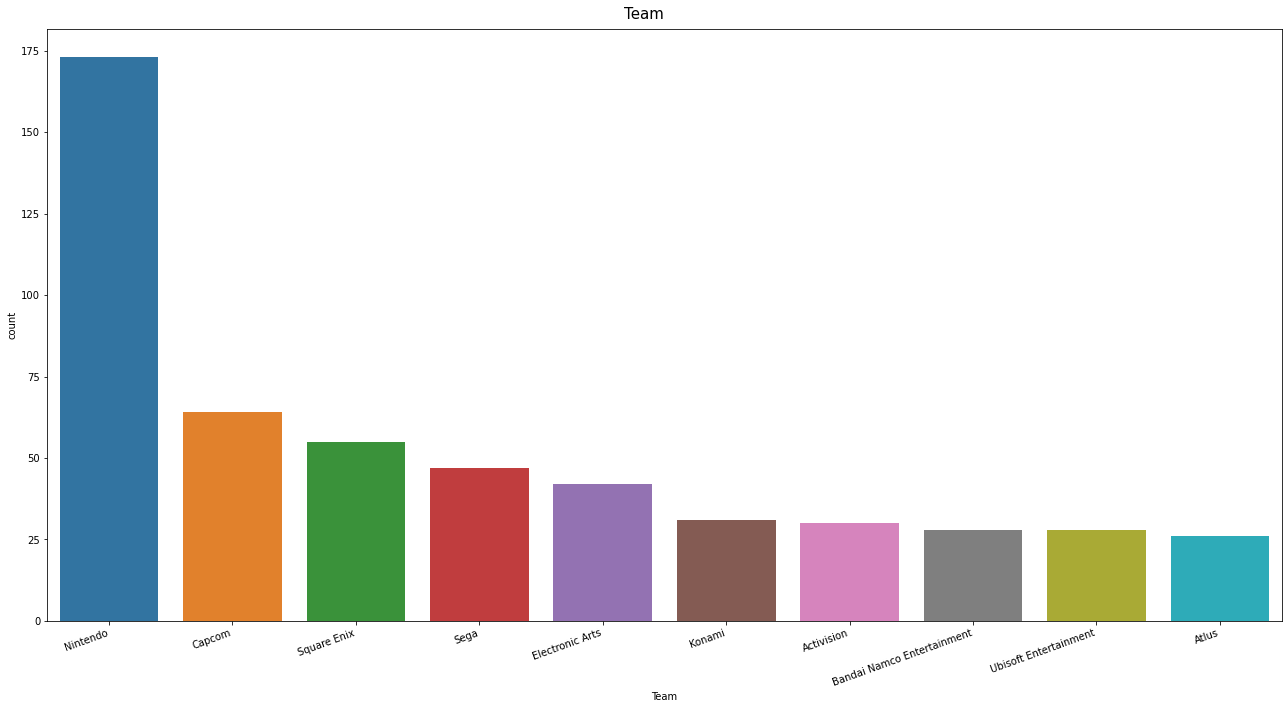

In [39]:
# Top 10 Development Teams Listed
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(18,10))
fig.suptitle('Team',fontsize=15)
chart = sns.countplot(video_games_team.Team, order = video_games_team['Team'].value_counts().iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
plt.tight_layout()

In [40]:
df = video_games_team.groupby('Team')['Rating'].mean().reset_index()

In [41]:
df.sort_values(by = ['Rating'], ascending = False).head(10)

,Team,Rating
60,Bay 12 Games,4.60
260,Inlusio Interactive,4.60
285,Kitfox Games,4.60
642,ZA/UM,4.60
294,Konami Digital Entertainment,4.60
341,Mobius Digital,4.55
35,Aniplex,4.50
156,EA,4.50
86,CD Projekt,4.50
580,Tour De Pizza,4.50


/Users/amberhuang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


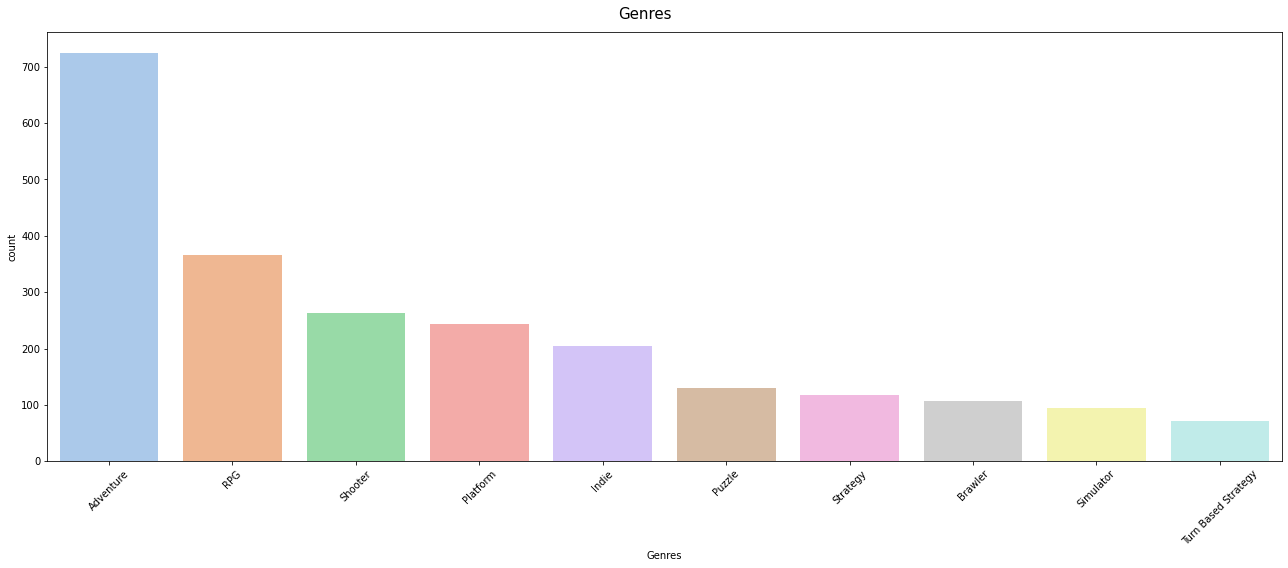

In [42]:
# Top 10 Genres Listed
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(18,8))
fig.suptitle('Genres',fontsize=15)
chart = sns.countplot(video_games_genre.Genres,order = video_games_genre['Genres'].value_counts().iloc[:10].index,
                      palette=sns.color_palette("pastel"))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.tight_layout()

In [43]:
df1 = video_games_genre.groupby('Genres')['Rating'].mean().reset_index()

In [45]:
df1 = df1.iloc[1:]

In [46]:
df1.sort_values(by = ['Rating'], ascending = False).head(10)

,Genres,Rating
23,Visual Novel,3.981481
22,Turn Based Strategy,3.821127
14,RPG,3.780601
21,Tactical,3.752381
12,Puzzle,3.735878
1,Adventure,3.703448
3,Brawler,3.670093
11,Point-and-Click,3.658333
6,Indie,3.642927
18,Simulator,3.635789


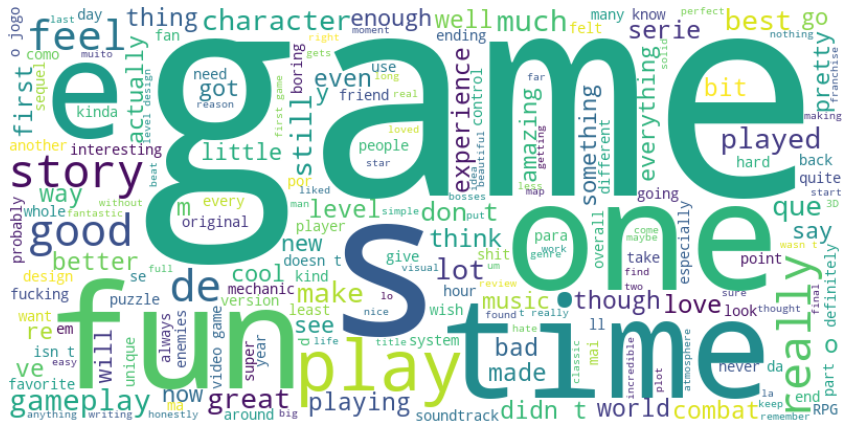

In [54]:
# Wordcloud of the Reviews Listed
text = str(list(video_games_complete['Reviews'])).replace('\"', '').replace('\'', '').replace('\\n',' ')
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 800,  height = 400, stopwords = STOPWORDS).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

array([[<AxesSubplot:title={'center':'Release_Date'}>,
        <AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Times_Listed'}>],
       [<AxesSubplot:title={'center':'Num_of_Reviews'}>,
        <AxesSubplot:title={'center':'Plays'}>,
        <AxesSubplot:title={'center':'Playing'}>],
       [<AxesSubplot:title={'center':'Backlogs'}>,
        <AxesSubplot:title={'center':'Wishlist'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

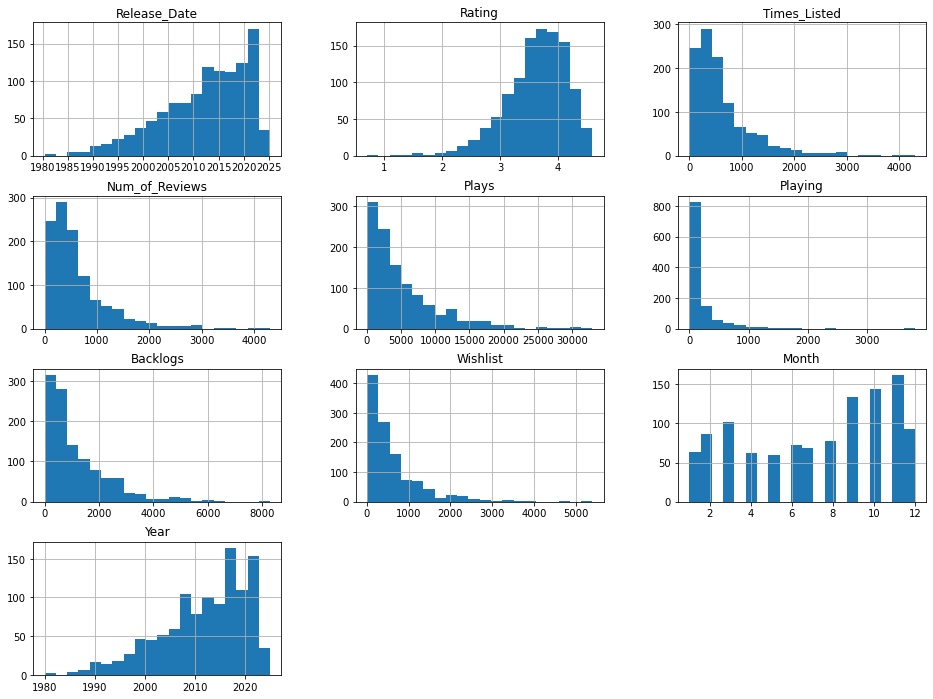

In [55]:
# Distribution of Data
video_games.hist(bins=20, figsize=(16,12))

/Users/amberhuang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


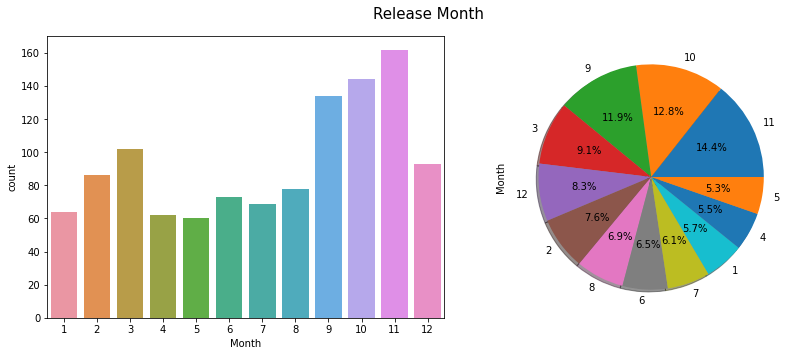

In [56]:
# Release Month Distribution
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
fig.suptitle('Release Month',fontsize=15)
sns.countplot(video_games.Month,ax=ax[0])
video_games.Month.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1], shadow = True)
plt.tight_layout()

/Users/amberhuang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


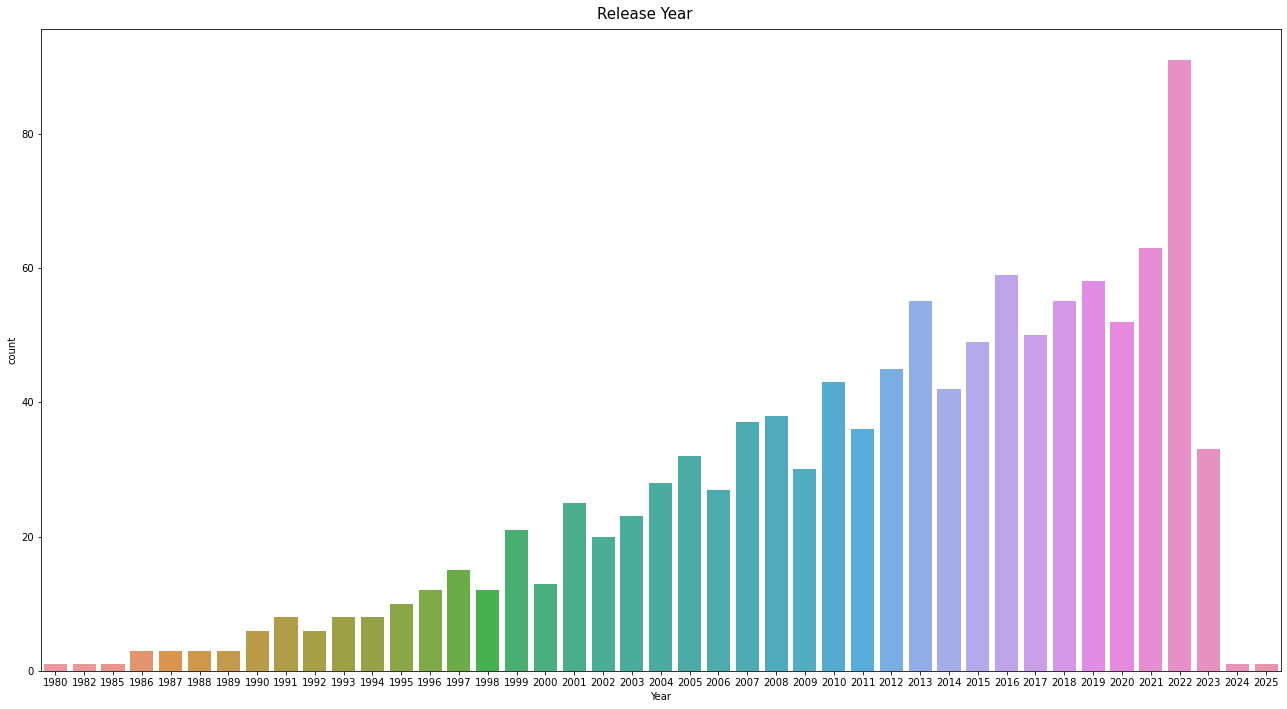

In [57]:
# Release Year Distribution
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(18,10))
fig.suptitle('Release Year',fontsize=15)
sns.countplot(video_games.Year)
plt.tight_layout()

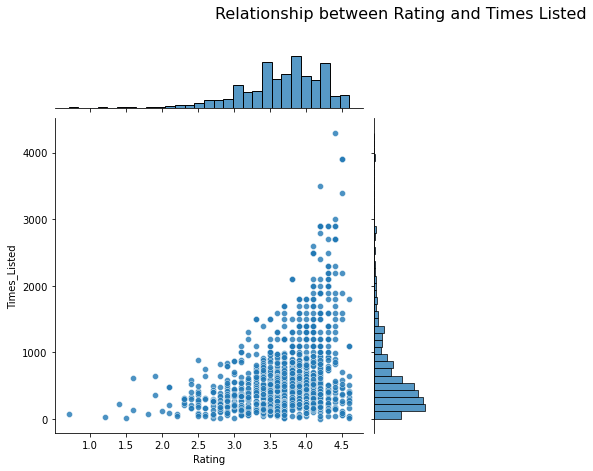

In [58]:
sns.jointplot(x='Rating', y='Times_Listed', data=video_games_complete, alpha=0.8, kind='scatter')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Times Listed', fontsize=14)
plt.title('Relationship between Rating and Times Listed', fontsize=16, pad=100)
plt.show()

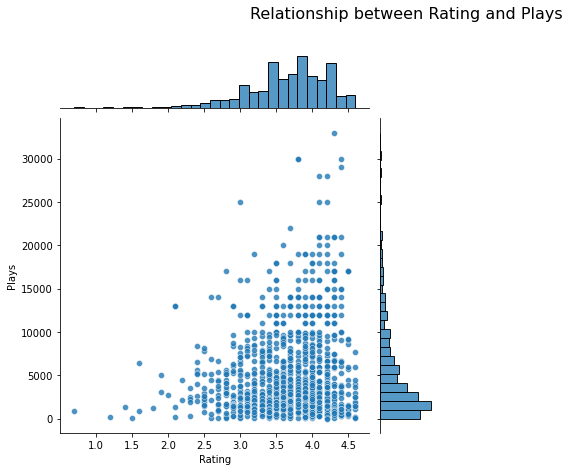

In [59]:
sns.jointplot(x='Rating', y='Plays', data=video_games_complete, alpha=0.8, kind='scatter')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Plays', fontsize=14)
plt.title('Relationship between Rating and Plays', fontsize=16, pad=100)
plt.show()

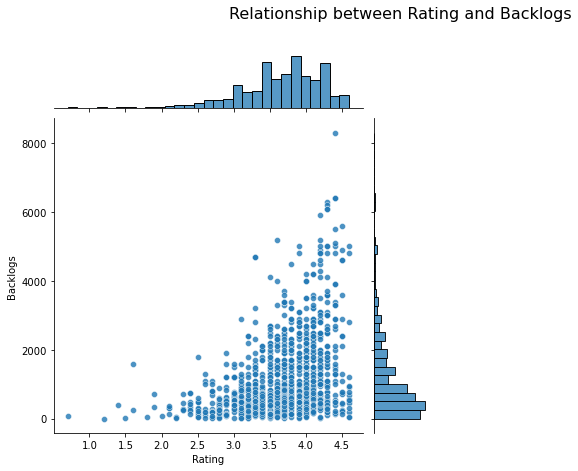

In [60]:
sns.jointplot(x='Rating', y='Backlogs', data=video_games_complete, alpha=0.8, kind='scatter')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Backlogs', fontsize=14)
plt.title('Relationship between Rating and Backlogs', fontsize=16, pad=100)
plt.show()

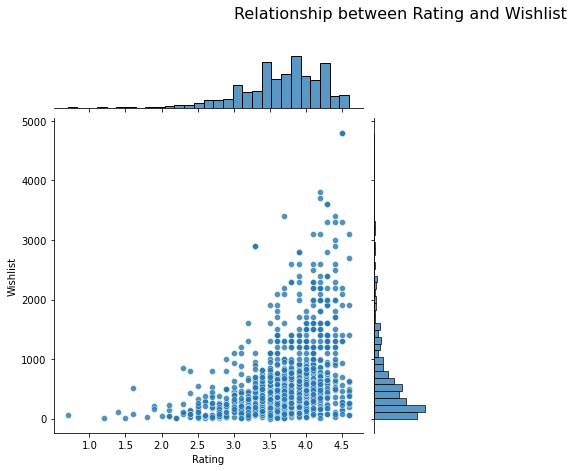

In [61]:
sns.jointplot(x='Rating', y='Wishlist', data=video_games_complete, alpha=0.8, kind='scatter')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Wishlist', fontsize=14)
plt.title('Relationship between Rating and Wishlist', fontsize=16, pad=100)
plt.show()

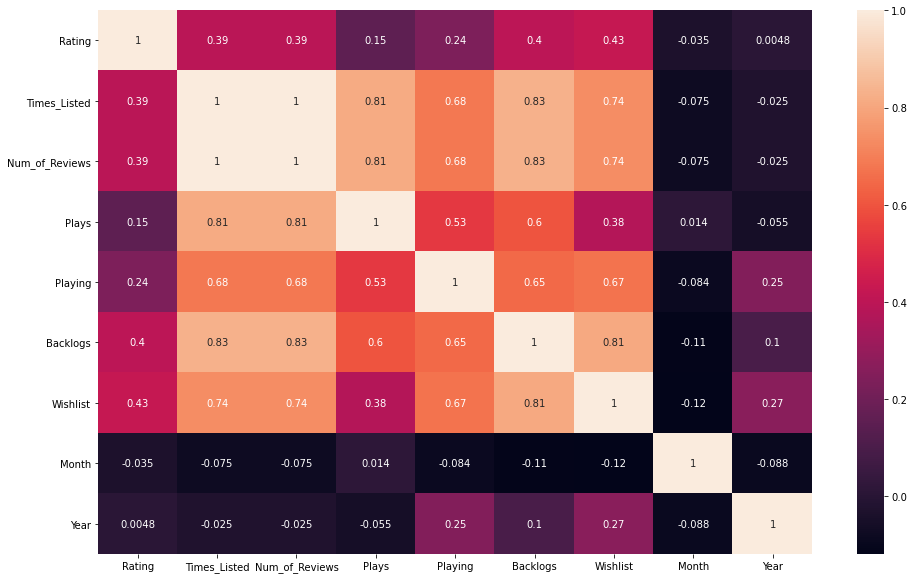

In [62]:
plt.figure(figsize = (16, 10))
sns.heatmap(video_games_complete.corr(),annot=True)
plt.show()

In [71]:
X = video_games_complete[['Times_Listed','Num_of_Reviews','Backlogs','Wishlist']]
Y = video_games_complete['Rating']
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)

In [68]:
print('Intercept: \n', linear_regressor.intercept_)
print('Coefficients: \n', linear_regressor.coef_)

Intercept: 
 3.405584906229086
Coefficients: 
 [7.05266290e-05 7.05266290e-05 2.10990802e-05 2.28819233e-04]


In [70]:
linear_regressor.score(X,Y)

0.19698969507596198